<a href="https://colab.research.google.com/github/RafaelTorresCH/senalesysistemas_/blob/main/senalesysistemas_%20/PARCIAL_1/PREGUNTA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Parcial 1 - Sistemas y Señales (2025-1)
### Nombre: Rafael Ricardo Torres Choperena

Este cuaderno contiene el desarrollo completo del problema propuesto en el parcial, siguiendo las instrucciones metodológicas y de estilo indicadas por la docente. Cada paso está comentado y justificado desde el punto de vista técnico, con el análisis conceptual, el procesamiento matemático y la simulación numérica.

---



# Acondicionamiento y Cuantización de Señal

En este notebook vamos a:

1. Definir la señal original  
2. Acondicionar (escalar y desplazar) la señal al rango de entrada del ADC  
3. Muestrear y cuantizar con un ADC de 5 bits (32 niveles)  
4. Visualizar la señal cuantizada, mostrando explícitamente los 32 niveles en el eje Y  

---

## Señal original

La señal compuesta se define como:

$$
x(t) = 20\sin\Bigl(7t - \frac{\pi}{2}\Bigr)\;-\;3\cos(5t)\;+\;2\cos(10t).
$$

La graficamos en dos períodos fundamentales, donde el período aproximado es $T = 2\pi$.

---

## Acondicionamiento

Para mapear el rango de la señal $[x_{\min}, x_{\max}]$ al rango físico del ADC $[V_{\min}, V_{\max}]$, resolvemos:

$$
\begin{cases}
a\,x_{\min} + b = V_{\min},\\
a\,x_{\max} + b = V_{\max}.
\end{cases}
$$

De ahí obtenemos la ganancia $a$ y el offset $b$ y construimos:

$$
y(t) = a\,x(t) + b.
$$

---

## Muestreo y cuantización

- Frecuencia de muestreo: $f_s = 20\,$Hz (periodo $T_s = 1/f_s$).  
- Bits del ADC: $N_{\text{bits}} = 5\quad\Rightarrow\quad 2^5 = 32\;\text{niveles}$.

Cada muestra cuantizada se calcula como

$$
k[n] = \mathrm{round}\!\Bigl(\tfrac{y[n] - V_{\min}}{V_{\max} - V_{\min}}\,(2^N-1)\Bigr),\quad
y_q[n] = V_{\min} + k[n]\;\tfrac{V_{\max}-V_{\min}}{2^N-1}.
$$


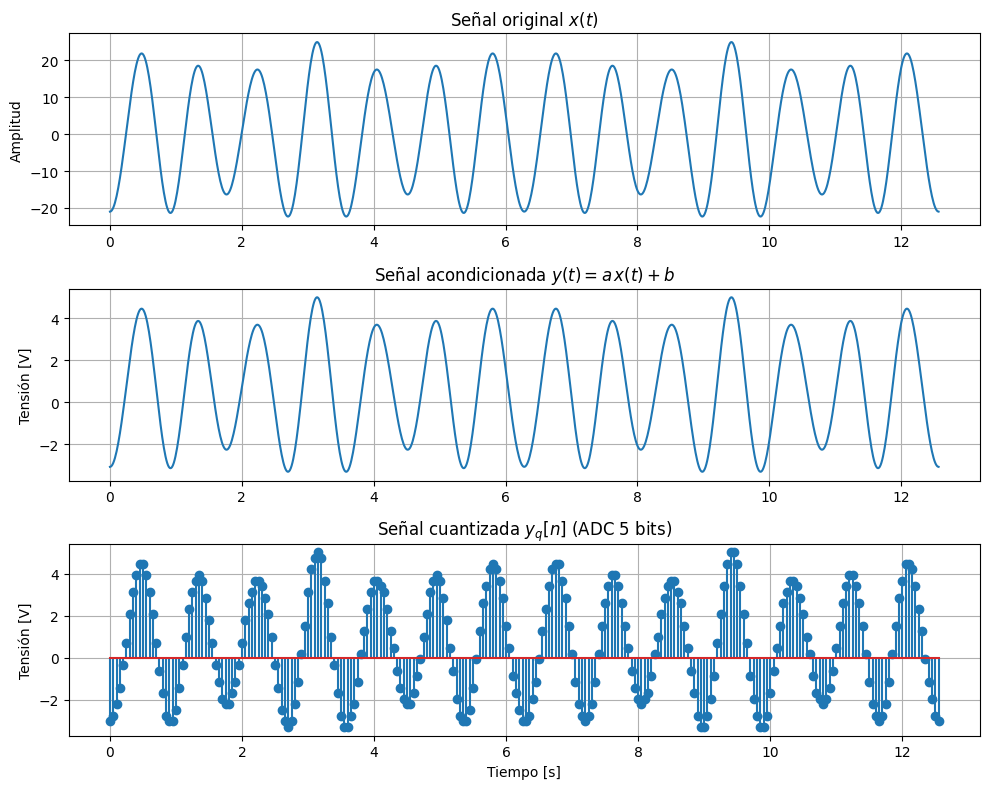

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# orque necesitamos 5 bits para 32 niveles
N_bits = 5
V_min, V_max = -3.3, 5.0
niveles = 2**N_bits               # 32 niveles

# Porque la senal tiene periodo ~2π
T_per = 2*np.pi
t_final = 2*T_per                # dos periodos
fs = 20                           # frecuencia de muestreo [Hz]
Ts = 1/fs                         # periodo de muestreo

#Porque asi graficamos la senal continua
t = np.linspace(0, t_final, 1000)
x = 20*np.sin(7*t - np.pi/2) - 3*np.cos(5*t) + 2*np.cos(10*t)

#Porque hay que mapear [xmin, xmax] → [V_min, V_max]
xmin, xmax = x.min(), x.max()
a = (V_max - V_min) / (xmax - xmin)
b = V_min - a*xmin
y = a*x + b                       # senal acondicionada

#porque toca muestrear esa senal
t_s = np.arange(0, t_final, Ts)
x_s = 20*np.sin(7*t_s - np.pi/2) - 3*np.cos(5*t_s) + 2*np.cos(10*t_s)
y_s = a*x_s + b                   # muestras acondicionadas

#Porque ahora cuantizamos uniformemente
k = np.round((y_s - V_min) / (V_max - V_min) * (niveles - 1))
k = np.clip(k, 0, niveles-1)
yq = V_min + k * (V_max - V_min) / (niveles - 1)

# Graficas
plt.figure(figsize=(10, 8))

# señal original
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Señal original $x(t)$')
plt.ylabel('Amplitud')
plt.grid()

# señal acondicionada
plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title('Señal acondicionada $y(t)=a\,x(t)+b$')
plt.ylabel('Voltios [V]')
plt.grid()

# señal cuantizada (5 bits)
plt.subplot(3, 1, 3)
plt.stem(t_s, yq)                # marcadores discretos
plt.title('Señal cuantizada $y_q[n]$ (ADC 5 bits)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltios [V]')
plt.grid()

# orque queremos ver los 32 niveles en el eje Y
niveles_q = np.linspace(V_min, V_max, niveles)
plt.yticks(niveles_q)

plt.tight_layout()
plt.show()
